<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Timeseries_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')
df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (485, 16)


,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv', sep=',',
parse_dates=['Date'], index_col='Date')

In [6]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

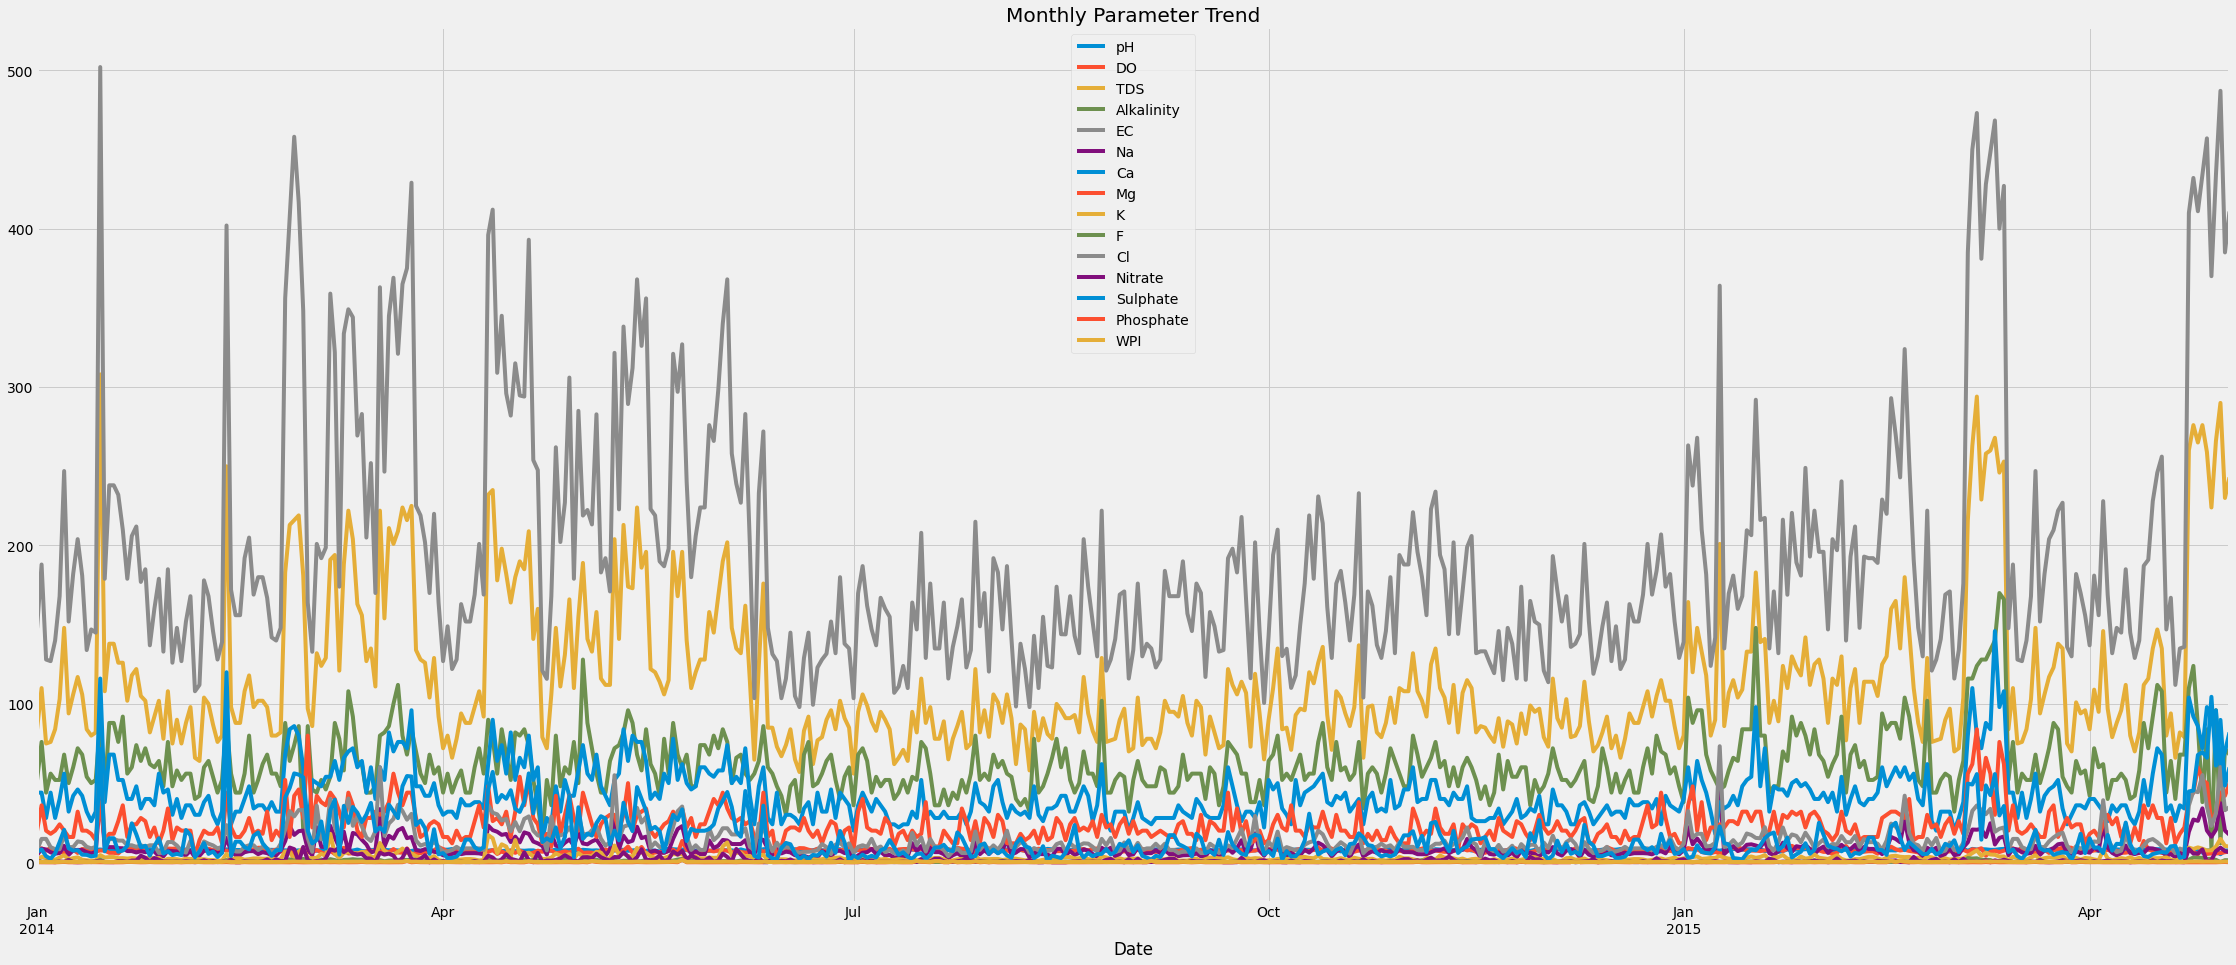

In [8]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv', sep=',', parse_dates=['Date'], index_col='Date')

df.plot(figsize=(35,15))
plt.title('Monthly Parameter Trend')
plt.show()

In [9]:
df.shape

(487, 15)

In [10]:
df=df.dropna()

In [11]:
data=df
data

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


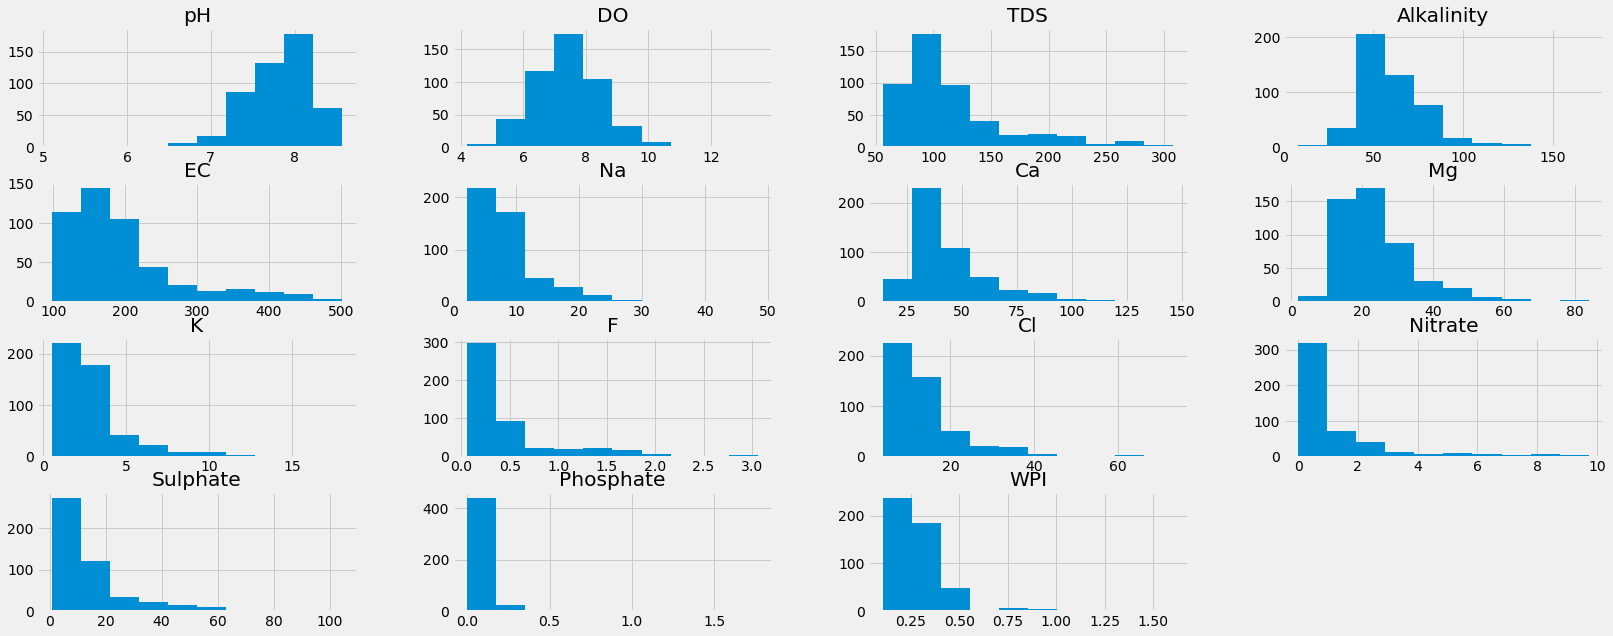

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(25,10))
data.hist(ax=ax1)
data.plot(kind='kde', ax=ax2)
plt.show();

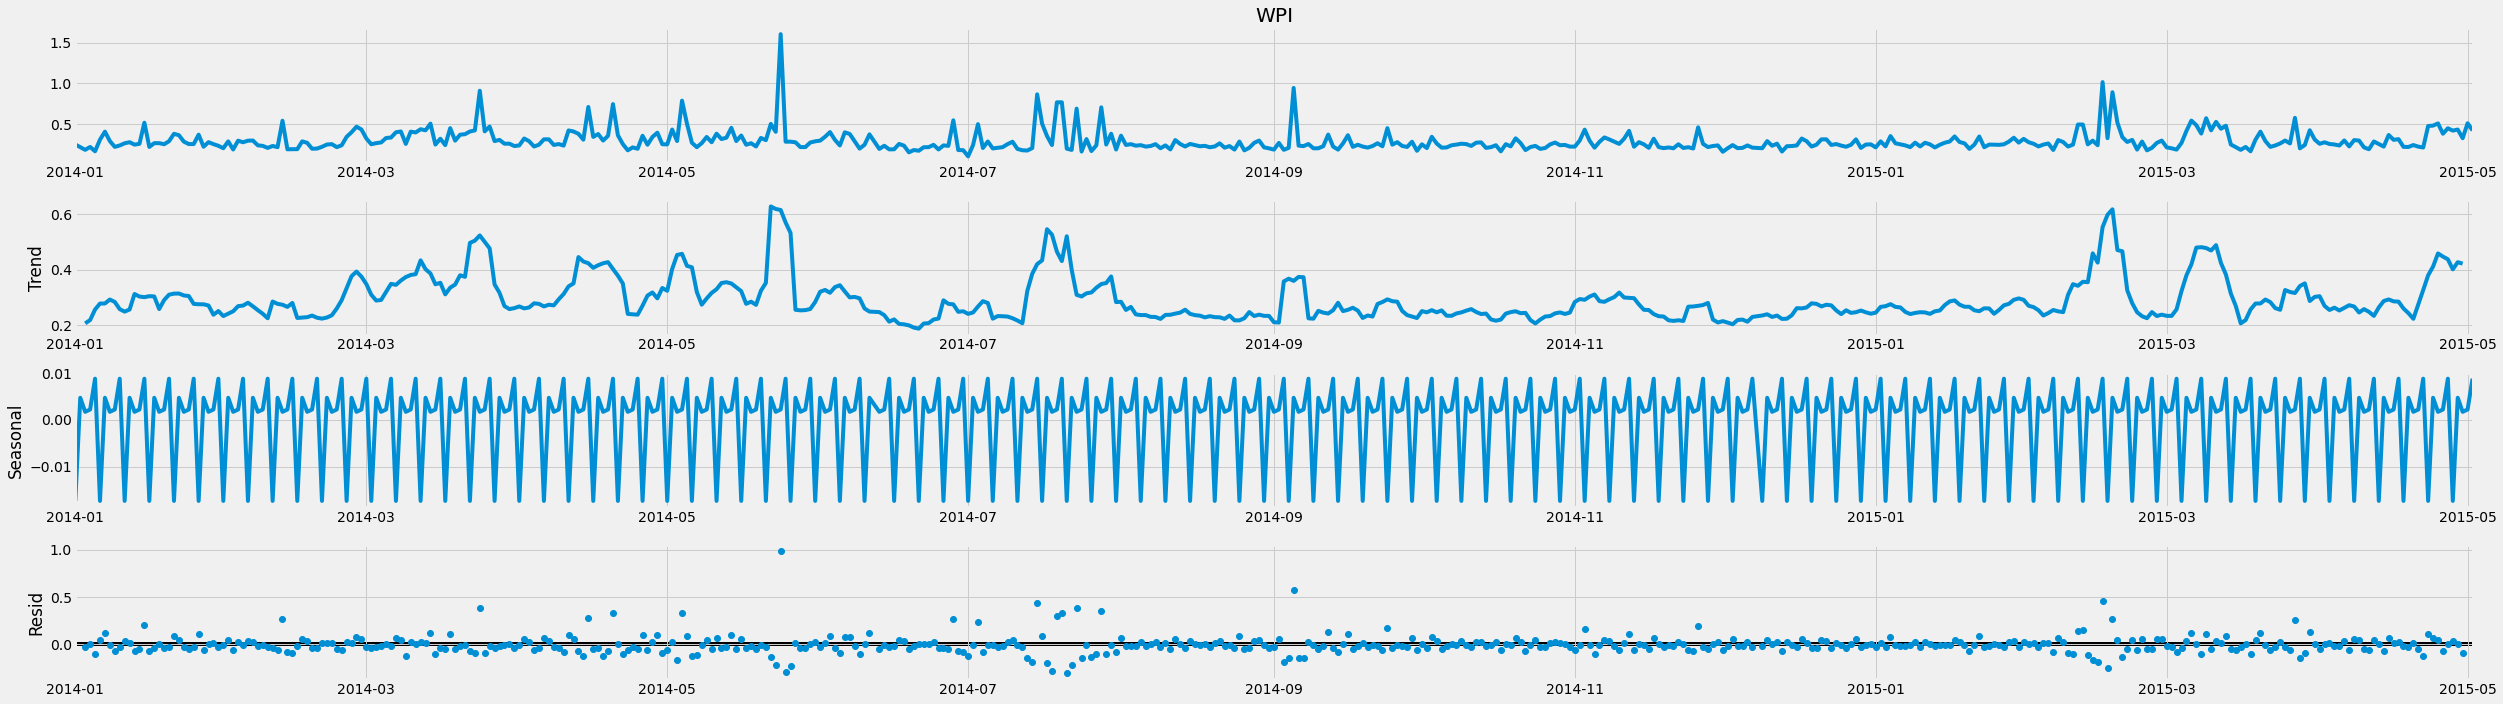

In [13]:
decomposition = seasonal_decompose(data['WPI'], freq=5, model='additive')
plt.rcParams['figure.figsize'] = 35, 10
decomposition.plot()
plt.show();

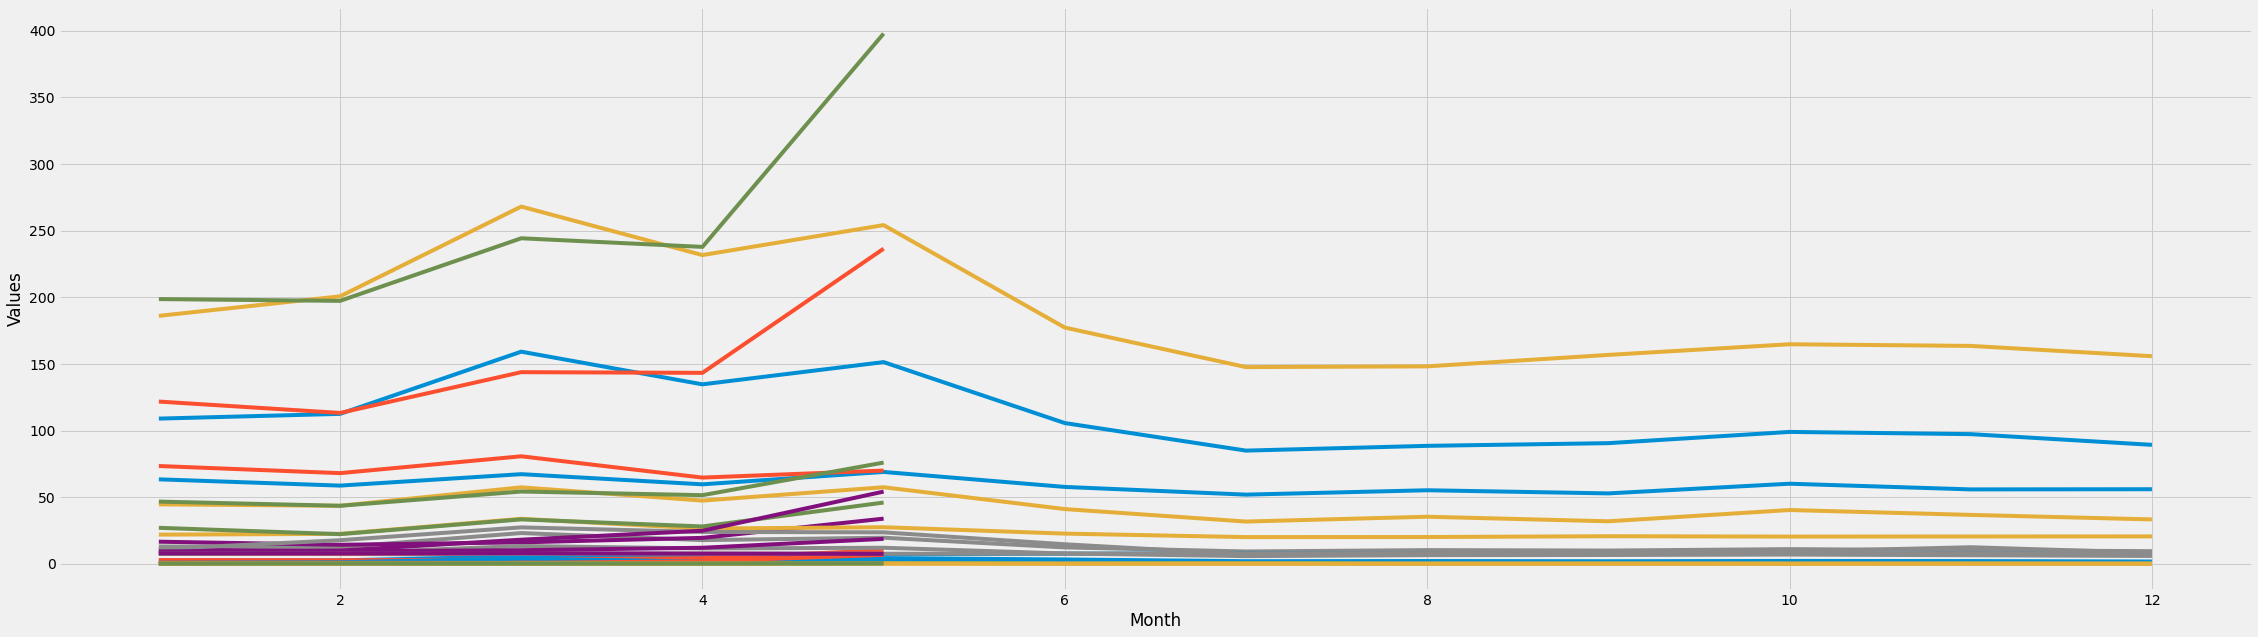

In [15]:
data['year'] = data.index.year
data['month'] = data.index.month
data_pivot = pd.pivot_table(data, index='month', columns='year', aggfunc='mean')
data_pivot.plot(figsize=(35,10))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()

In [16]:
df.drop(['year', 'month'], axis=1, inplace=True)

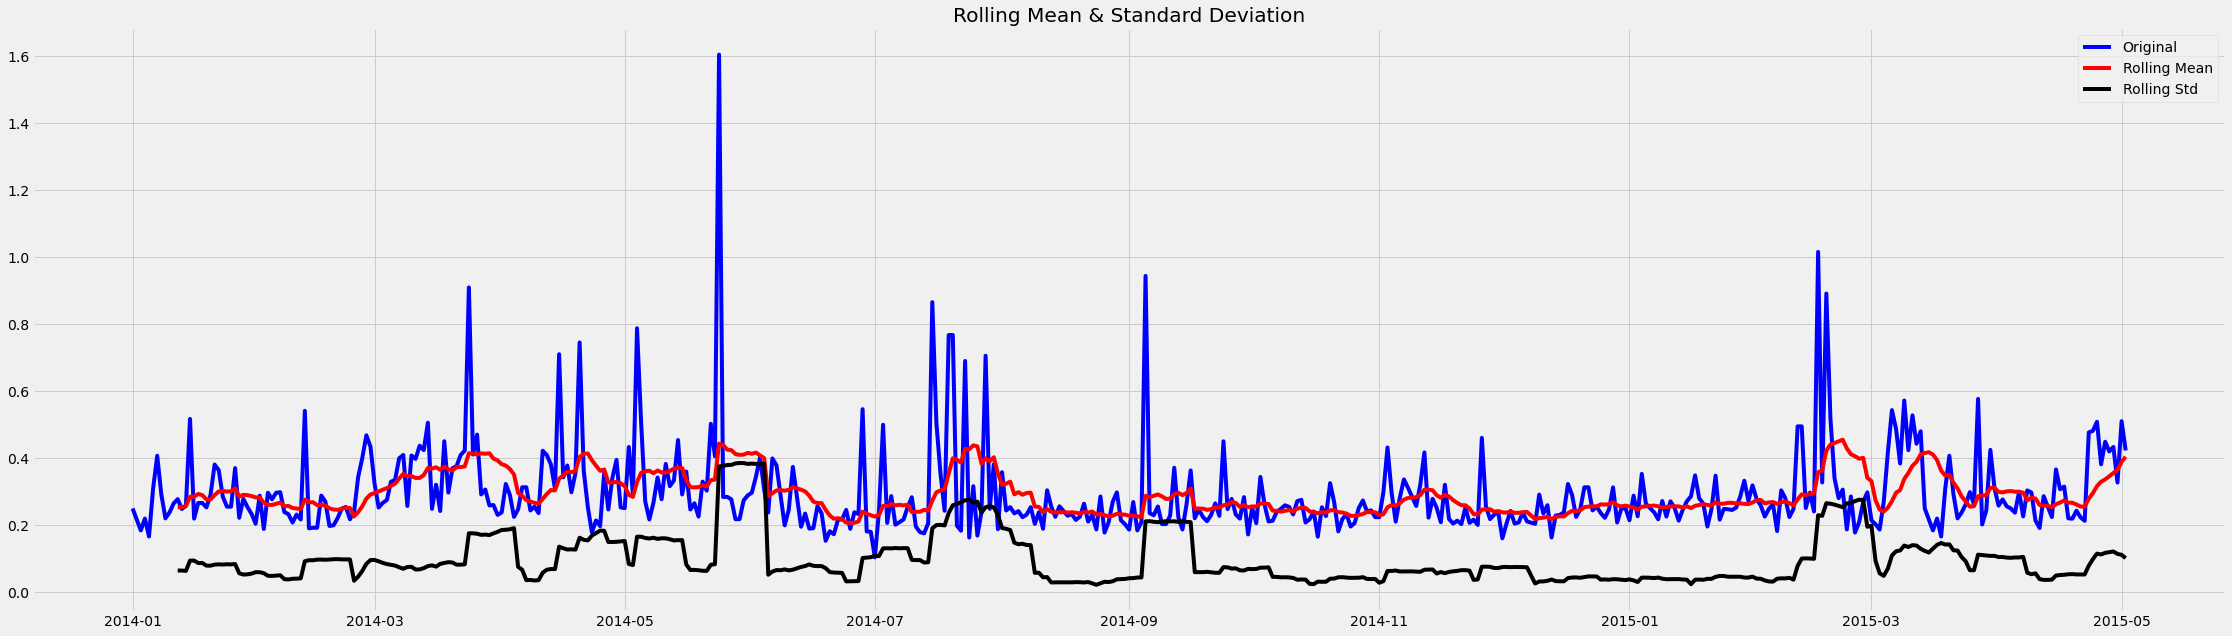

In [17]:
#Determing rolling statistics
rolmean = pd.Series(data['WPI']).rolling(window=12).mean()
rolstd = pd.Series(data['WPI']).rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(data['WPI'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data['WPI'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.168207e+00
p-value                        8.765895e-13
#Lags Used                     3.000000e+00
Number of Observations Used    4.810000e+02
Critical Value (1%)           -3.444018e+00
Critical Value (5%)           -2.867568e+00
Critical Value (10%)          -2.569980e+00
dtype: float64


In [19]:
df_diff = data.diff().diff(12)

In [20]:
df_diff.dropna(inplace=True)

In [21]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['WPI'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.080418e+01
p-value                        1.982631e-19
#Lags Used                     1.800000e+01
Number of Observations Used    4.530000e+02
Critical Value (1%)           -3.444868e+00
Critical Value (5%)           -2.867941e+00
Critical Value (10%)          -2.570180e+00
dtype: float64


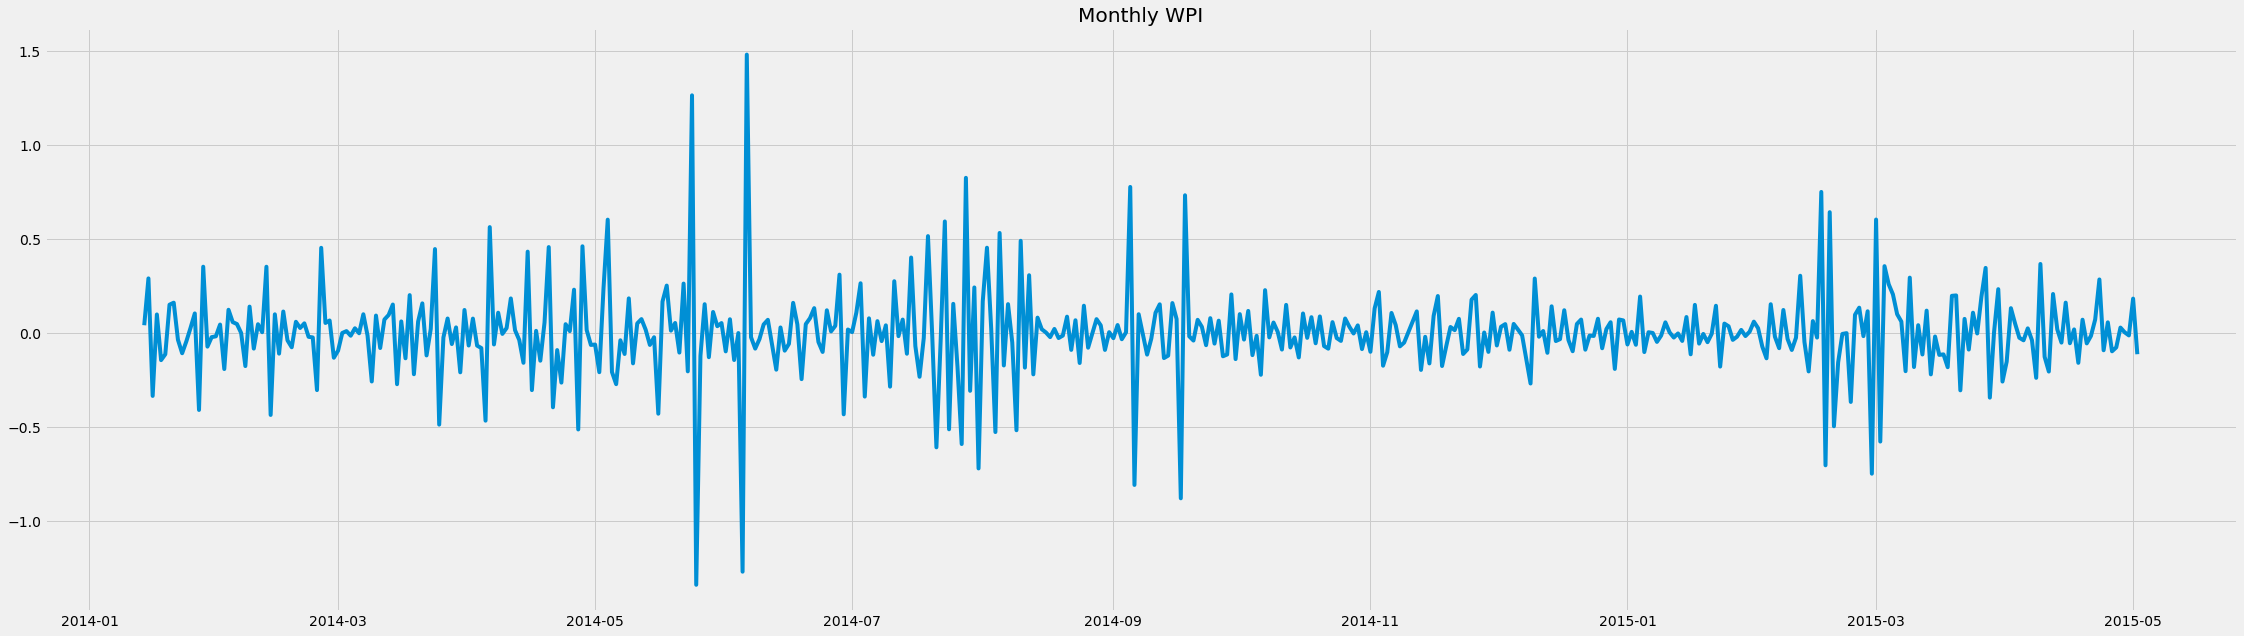

In [22]:
plt.plot(df_diff['WPI'])
plt.title('Monthly WPI')
plt.savefig('diffplot')
plt.show()

In [ ]:
pip install pmdarima

In [23]:
import pmdarima as pm
model = pm.auto_arima(data['WPI'], d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.74 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=0.690, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-268.264, Time=1.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-124.486, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-315.916, Time=3.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.49 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-196.219, Time=2.55 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-340.720, Time=4.66 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-298.127, Time=2.48 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.22 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.89 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-373.098, Time=6.54 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-320.11

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  485
Model:             SARIMAX(4, 1, 1)x(2, 1, [], 12)   Log Likelihood                 221.787
Date:                             Thu, 03 Jun 2021   AIC                           -425.575
Time:                                     13:29:11   BIC                           -388.162
Sample:                                          0   HQIC                          -410.858
                                             - 485                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.335e-06      0.000     -0.018      0.985      -0.000       0.000
ar.L1          0.1957      0.037      5.226      0.000       0.122       0.269
ar.L2          0.1012      0.033      3.083      0.002       0.037       0.166
ar.L3         -0.0188      0.050     -0.374      0.708      -0.118       0.080
ar.L4          0.0804      0.034      2.377      0.017       0.014       0.147
ma.L1         -0.9822      0.017    -58.570      0.000      -1.015      -0.949
ar.S.L12      -0.6345      0.023    -27.324      0.000      -0.680      -0.589
ar.S.L24      -0.2671      0.027     -9.743      0.000      -0.321      -0.213
sigma2         0.0224      0.001     35.594      0.000       0.021       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              5033.21
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

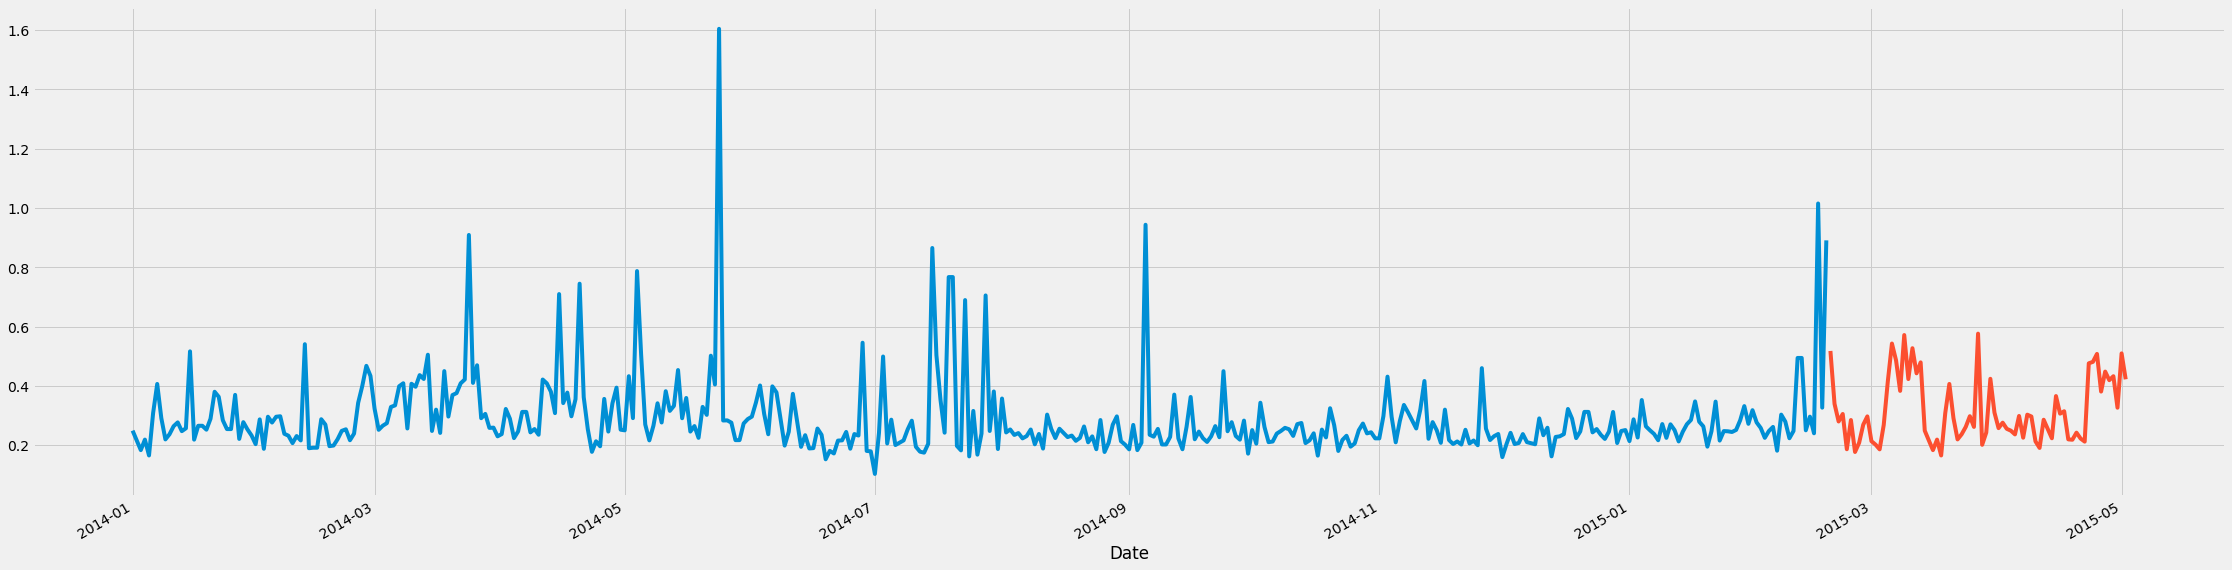

In [26]:
#divide into train and validation set
train = data[:int(0.85*(len(df)))]
test = data[int(0.85*(len(df))):]

#plotting the data
train['WPI'].plot()
test['WPI'].plot()

In [27]:
model = SARIMAX(train['WPI'],order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  WPI   No. Observations:                  412
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 167.620
Date:                              Thu, 03 Jun 2021   AIC                           -329.241
Time:                                      13:30:55   BIC                           -317.274
Sample:                                           0   HQIC                          -324.501
                                              - 412                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4961      0.017    -28.718      0.000      -0.530      -0.462
ma.S.L12      -0.9988      2.117     -0.472      0.637      -5.147       3.150
sigma2         0.0227      0.048      0.477      0.633      -0.071       0.116
===================================================================================
Ljung-Box (L1) (Q):                   6.42   Jarque-Bera (JB):              3252.58
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

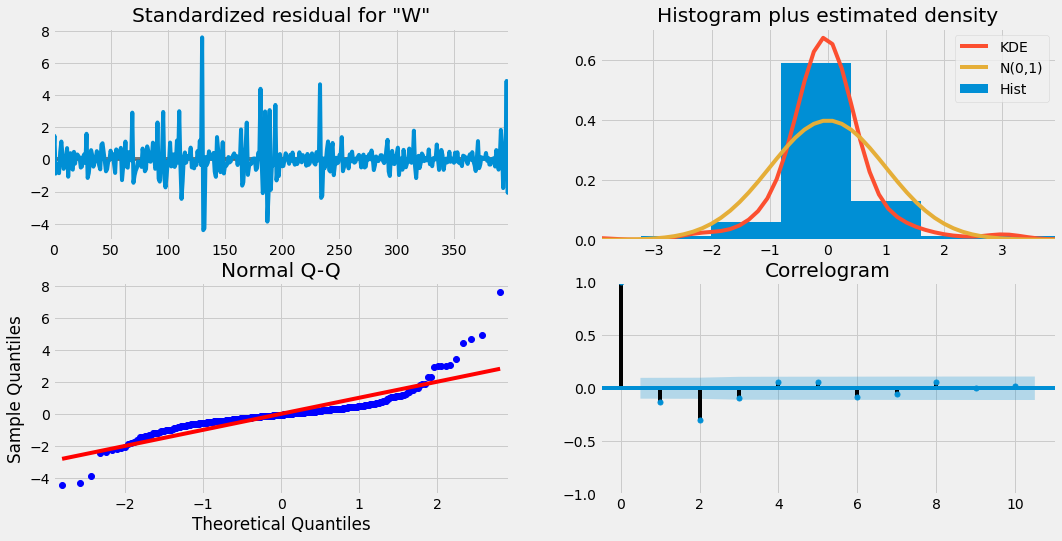

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()